In [81]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier


# Probelm Definition 


The following dataset contains the data related to Avacado belonging to United States Of America, Which has various attributes 

#Problems we are going to address are 
#1.Predicting the average price of Avacado's using the rest of the attributes 
#2.Predicting the region the Avacado belongs to 
#3.Knowing which Parameters effect the Average price of Avacado 
#4.Correlation each attribute has with that of target variables 

In [4]:
url="https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv"

In [31]:
df=pd.read_csv(url,sep=",")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#Attributes and their Meaning 

#AveragePrice - the average price of a single avocado
#type - conventional or organic new values
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#4046 - Total number of avocados with PLU 4046 sold
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold

In [32]:
df.dropna(axis=0,inplace=True)

In [33]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [35]:
#Changing Data types 
df["Date"]= pd.to_datetime(df["Date"])

In [28]:
print('\n'"Total No of Regions that the Avacado is brought from:",len(df['region'].unique()),end='\n\n')
print(df['region'].unique())
df['region'].value_counts()


Total No of Regions that the Avacado is brought from: 51

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

In [36]:
df[df["region"]== "TotalUS"]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1182,2015-06-21,1.02,35734613.90,14699604.93,13244466.60,1326422.56,6464119.81,5517909.51,898027.46,48182.84,conventional,2015.0,TotalUS
1183,2015-06-14,0.98,37026085.75,16383685.07,12821015.03,1085081.61,6736304.04,5893641.72,822399.78,20262.54,conventional,2015.0,TotalUS
1184,2015-07-06,1.00,36549995.66,16529797.60,12582265.21,1144715.95,6293216.90,5304562.91,943995.95,44658.04,conventional,2015.0,TotalUS
1185,2015-05-31,1.03,33720159.09,15503613.33,11599634.02,903908.35,5713003.39,4967231.63,726046.25,19725.51,conventional,2015.0,TotalUS
1186,2015-05-24,1.04,35344183.15,16000107.80,12513821.19,899779.92,5930474.24,5094263.38,815628.55,20582.31,conventional,2015.0,TotalUS
1187,2015-05-17,1.06,32027686.15,14615941.59,11003341.22,963549.53,5444853.81,4747544.74,660983.55,36325.52,conventional,2015.0,TotalUS
1188,2015-10-05,1.02,36400886.58,16215328.75,13509064.65,858145.45,5818347.73,4991625.82,816629.40,10092.51,conventional,2015.0,TotalUS
1189,2015-03-05,0.96,41291704.39,17787611.93,16602589.04,1118329.50,5783173.92,4647155.48,1110987.23,25031.21,conventional,2015.0,TotalUS
1190,2015-04-26,1.07,30894157.80,13833715.28,10867403.08,889732.20,5303307.24,4584203.44,687179.40,31924.40,conventional,2015.0,TotalUS
1191,2015-04-19,1.03,33091256.26,14251319.31,12277858.78,1016631.26,5545446.91,4696224.79,819935.17,29286.95,conventional,2015.0,TotalUS


In [ ]:
#"Total US" gives a wrong measue of the data, as it sums up the data so it is better to dropped 

In [37]:
df.drop(df[df['region'] == "TotalUS"].index, inplace = True) 
# Print the shape of the dataframe 
print(df.shape)

(1492, 13)


# Data Analysis

In [39]:
print(df['type'].unique())
#"Type" Column Can be dropped as it has only one value i.e.,Conventional

['conventional']


In [ ]:
#In dataset we have on one type of Avacadoe's which are "conventional" 

In [38]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.00000
mean,1.076052,1.076824e+06,4.189024e+05,4.132565e+05,35330.334832,2.093352e+05,1.772200e+05,30294.461267,1820.670047,2015.16555
std,0.190216,1.727371e+06,8.089122e+05,6.319854e+05,71187.963806,3.837528e+05,3.323543e+05,68220.274767,6707.327960,0.37180
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000,3.311770e+03,3.311770e+03,0.000000,0.000000,2015.00000
25%,0.970000,1.459015e+05,1.991350e+04,4.101626e+04,863.037500,3.548741e+04,2.944999e+04,508.777500,0.000000,2015.00000
50%,1.080000,3.932236e+05,7.798568e+04,1.104232e+05,7292.550000,7.300698e+04,6.056674e+04,4736.270000,0.000000,2015.00000
75%,1.190000,9.303774e+05,3.294519e+05,4.552018e+05,26242.595000,1.488641e+05,1.346426e+05,26317.822500,329.470000,2015.00000
max,1.680000,1.036170e+07,4.668965e+06,3.950852e+06,478701.640000,3.056113e+06,2.693843e+06,699956.700000,108072.790000,2016.00000


From the availabe Data we can understand the follwing  

#The dataset contains the data of Years 2015 and 2016 
#This Data is Recoreded from 2015-01-02 - 2016-12-25

#AveragePrice of Avacados range between 0.49\\$-1.68\\$

#Total Volume sold range between 38K - 1,03,6170 

#Total Bags range between 3K - 3,05,611

In [41]:
df.drop("type",axis=1,inplace=True)

# EDA 

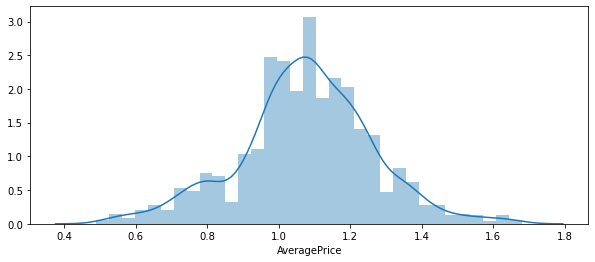

In [48]:
plt.subplots(figsize=(10, 4))
sns.distplot(df.AveragePrice)
plt.show()

In [49]:
print("Skewness: %f" % df['AveragePrice'].skew())

Skewness: -0.109444


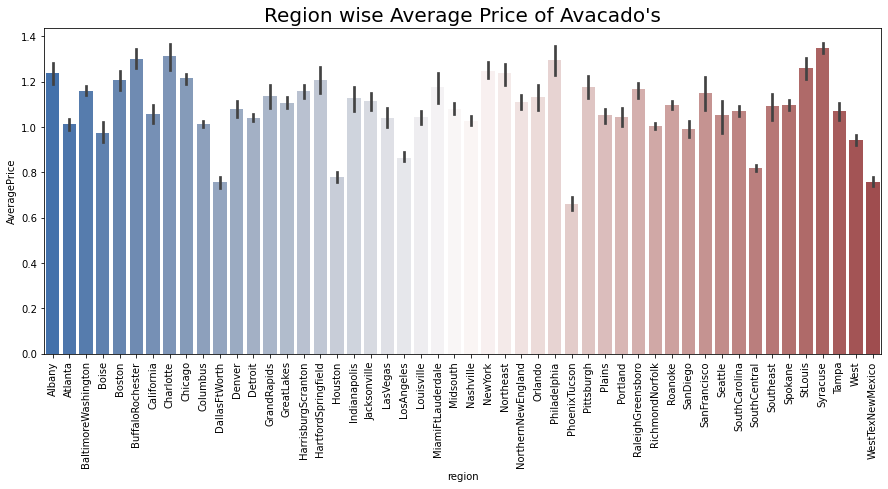

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y = 'AveragePrice', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title("Region wise Average Price of Avacado's", fontsize = 20)
plt.show()

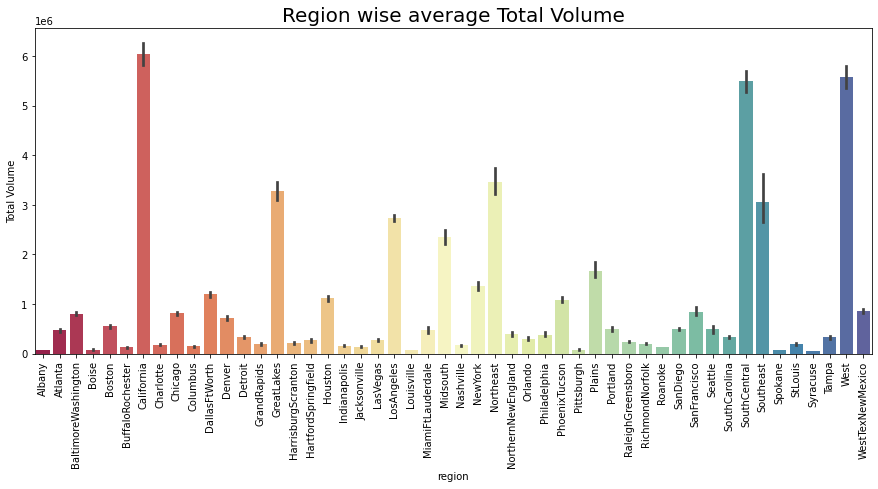

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y = 'Total Volume', data = df, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Region wise average Total Volume', fontsize = 20)
plt.show()

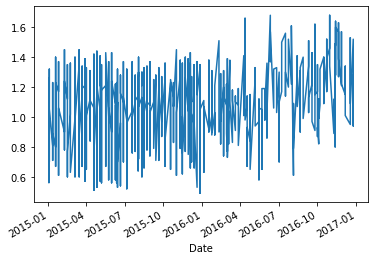

In [44]:
df.set_index("Date",inplace=True)
df["AveragePrice"].plot()

Average price has increased from \\$1.4 to \\$1.6 from April of 2016(2016-04)

In [50]:
#To better understand the data we should change the region data using label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["region"]] = df[["region"]].apply(le.fit_transform)

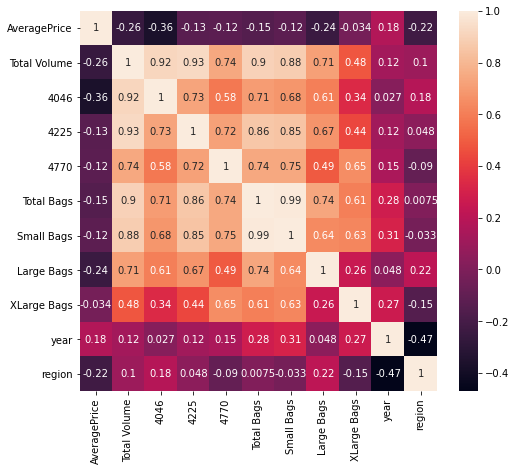

In [47]:
corr_hmap= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

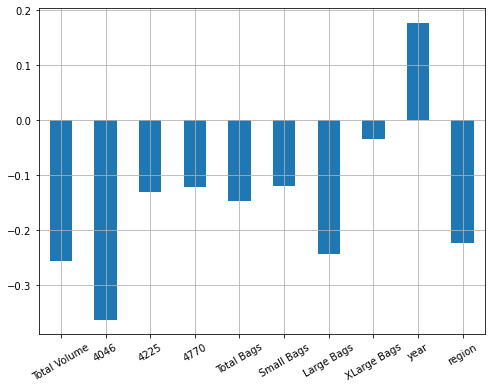

In [48]:
plt.figure(figsize=(8,6))
df.drop("AveragePrice",axis=1).corrwith(df["AveragePrice"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

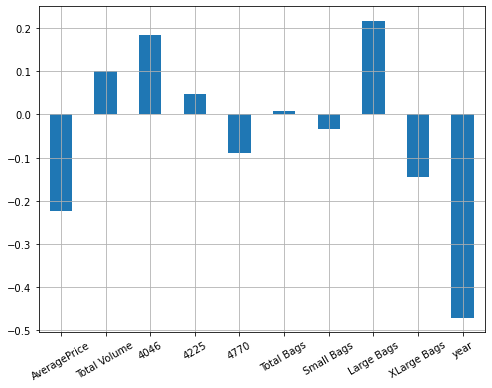

In [49]:
plt.figure(figsize=(8,6))
df.drop("region",axis=1).corrwith(df["region"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

# EDA Concluding Remarks

In [136]:
#Total Volume
#Regions California, SouthCentral and West have heighes Average Volume
#Followed by Southeast, GreatLakes, Northeast ,MidSouth, LosAngeles

#Average Price 
#Average price has increased from \\$1.4 to \\$1.6 from April of 2016(2016-04)

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#Correlation of Attributes with that of Average Price 

#Positive  Correlation with Target
#year - "18%"

#Negative Correlation with Target

#Total Volume - "-26%"
#4046    - "-36%"
#4225    - "-13%"
#4770    - "-12%" 
#Total Bags- "-15%"
#region-"-22%"

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#Correlation of attributes with that of region 

#Positive Correlation with Target

#Total Volume - "10%"
#4046    - "18%"
#4225    - "4%"

#Negative Correlation with Target
#year - "-47%"
#4770    - "-9%" 
#Average Price - "-22%"

# Pre-processing Pipeline

In [52]:
#To better understand the data we should change the region data using label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["region"]] = df[["region"]].apply(le.fit_transform)

In [ ]:
#we are going to predict the average price 

In [119]:
y=df["AveragePrice"]
x=df.drop("AveragePrice", axis=1)

In [120]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [121]:
max_scr=0
for i in range(30,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 477 The model Perfomes very well
Training r2_score is: 21.416267574689552
Testing r2_score is: 21.42456781914711
At random state 483 The model Perfomes very well
Training r2_score is: 21.346460308948533
Testing r2_score is: 21.3534237740566


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=477)
num_folds = 10
seed = 477
scoring = 'neg_mean_squared_error'

# Building Machine Learning Models

In [63]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(3)),
    ("SVR",SVR()),
    ("RandomForestRegressor",RandomForestRegressor())
    ]

In [64]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2)
    print(msg)


R2 Score with Lasso: -0.000369 
R2 Score with Linear Regression: 0.214246 
R2 Score with Decision Tree: 0.688116 
R2 Score with Ridge Regression: 0.214266 
R2 Score with KNearest Neighbors: 0.831895 
R2 Score with SVR: 0.550903 
R2 Score with RandomForestRegressor: 0.804526 


We can observe a significant jump in the score when we used KNearest Neighbors and RandomForestRegressor with 80%+ Accuracy 

In [77]:
#we Can go ahead with hyper parameter tuning for both KNN and RandomForestRegressor 

In [65]:

# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsRegressor()
n_neighbors = range(1, 13, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [66]:
KNN= KNeighborsRegressor(metric= 'manhattan', n_neighbors= 3, weights= 'distance')
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
y_pred = KNN.predict(x_test)

KNNs = r2_score(y_test,y_pred)
print("r2 score is :",KNNs*100)

KNNscore=cross_val_score(KNN,x_t,y,cv=3)
KNNc=KNNscore.mean()
print("Cross value Score:",KNNc)

r2 score is : 85.47390469773678
Cross value Score: 0.03856187944717434


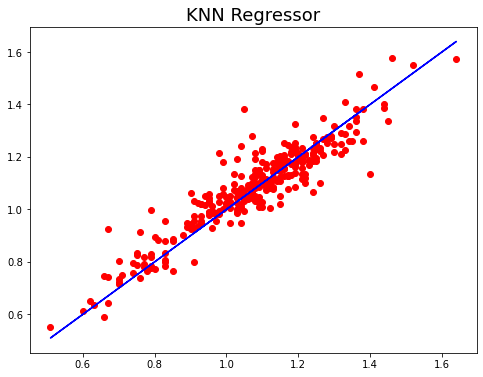

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("KNN Regressor",fontsize=18)
plt.show()

In [68]:
model=RandomForestRegressor()

n_estimators= [10,20,30]
max_features= [5, 10], 
max_depth= [10,20,50, None] 
bootstrap = [True, False]
criterion= ["mse", "mae"]
    
grid = dict(n_estimators=n_estimators,max_depth=max_depth, criterion=criterion)  

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 20, 'n_estimators': 30}


In [71]:
rf = RandomForestRegressor(criterion = 'mse', max_depth = 20, n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_predrf = rf.predict(x_test)

rfs = r2_score(y_test,y_predrf)
print("r2 score is :",rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print("Cross value Score:",rfc)

r2 score is : 80.68955671901526
Cross value Score: 0.18763000745426495


Randon forest was not able to improve the score so we are going ahead with KNN

In [73]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#score variables
rf_MAE = round(MAE(y_test, y_pred),2)
rf_MSE = round(MSE(y_test, y_pred),2)
rf_R_2 = round(r2_score(y_test, y_pred),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"KNN Mean Absolute Error: {rf_MAE}\n")
print(f"KNN Mean Squared Error: {rf_MSE}\n")
print(f"KNN R^2 Score: {rf_R_2*100}\n")
print(f"KNN Cross val Score: {rf_CS}\n")

KNN Mean Absolute Error: 0.05

KNN Mean Squared Error: 0.0

KNN R^2 Score: 85.47

KNN Cross val Score: 0.1833



In [74]:
rf_MAE = round(MAE(y_test, y_predrf),2)
rf_MSE = round(MSE(y_test, y_predrf),2)
rf_R_2 = round(r2_score(y_test,y_predrf),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"RFR Mean Absolute Error: {rf_MAE}\n")
print(f"RFR Mean Squared Error: {rf_MSE}\n")
print(f"RFR R^2 Score: {rf_R_2*100}\n")
print(f"RFR Cross val Score: {rf_CS}\n")

RFR Mean Absolute Error: 0.06

RFR Mean Squared Error: 0.01

RFR R^2 Score: 80.69

RFR Cross val Score: 0.2353



In [82]:

models= [AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(r2_score(y_test, predm)) 
    print(cross_val_score(rf,x_t,y,cv=3).mean(),4)
    print("****************************************************************")
    print("\n")

[AdaBoostRegressor()]:
0.5709919637115426
0.19514791822155722 4
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor()]:
0.8738252229960657
0.1866873782438289 4
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]:
0.7269445785545643
0.2160188687189166 4
****************************************************************




In [78]:
from sklearn.ensemble import AdaBoostRegressor
#Creating AdaBoost Regressor 
ad=AdaBoostRegressor(n_estimators=50,base_estimator=KNN)
ad.fit(x_train,y_train)

ad_pred= ad.predict(x_test)
ABs = r2_score(y_test,ad_pred)
print("r2 score is :",ABs*100)

ABscore=cross_val_score(ad,x_t,y,cv=3)
ABc=ABscore.mean()
print("Cross value Score:",ABc)

r2 score is : 84.94440568937165
Cross value Score: 0.01683363353107466


In [80]:
Ad_MAE = round(MAE(y_test, ad_pred),2)
Ad_MSE = round(MSE(y_test, ad_pred),2)
Ad_R_2 = round(r2_score(y_test, ad_pred),4)
Ad_CS  = round(cross_val_score(ad,x_t,y,cv=3).mean(),4)

print(f"AB Mean Absolute Error: {Ad_MAE}\n")
print(f"AB Mean Squared Error: {Ad_MSE}\n")
print(f"AB R^2 Score: {Ad_R_2*100}\n")
print(f"AB val Score: {Ad_CS}\n")

AB Mean Absolute Error: 0.05

AB Mean Squared Error: 0.01

AB R^2 Score: 84.94

AB val Score: 0.0258



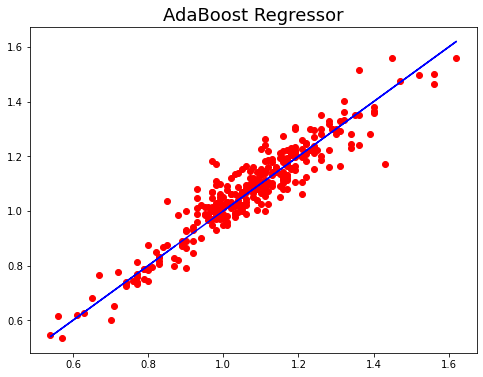

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ad_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("AdaBoost Regressor",fontsize=18)
plt.show()

In [123]:
ETR=ExtraTreesRegressor(n_estimators=100)
ETR.fit(x_train,y_train)

ETR_pred= ETR.predict(x_test)
ETRs = r2_score(y_test,ETR_pred)
print("r2 score is :",ETRs*100)

ETRscore=cross_val_score(ETR,x_t,y,cv=3)
ETRc=ETRscore.mean()
print("Cross value Score:",ETRc)

r2 score is : 86.87440699518781
Cross value Score: 0.313143463353758


In [124]:
ETR_MAE = round(MAE(y_test, ETR_pred),2)
ETR_MSE = round(MSE(y_test, ETR_pred),2)
ETR_R_2 = round(r2_score(y_test, ETR_pred),4)
ETR_CS  = round(cross_val_score(ETR,x_t,y,cv=3).mean(),4)

print(f"ETR Mean Absolute Error: {ETR_MAE}\n")
print(f"ETR Mean Squared Error: {ETR_MSE}\n")
print(f"ETR R^2 Score: {ETR_R_2*100}\n")
print(f"ETR val Score: {ETR_CS}\n")

ETR Mean Absolute Error: 0.05

ETR Mean Squared Error: 0.0

ETR R^2 Score: 86.87

ETR val Score: 0.3379



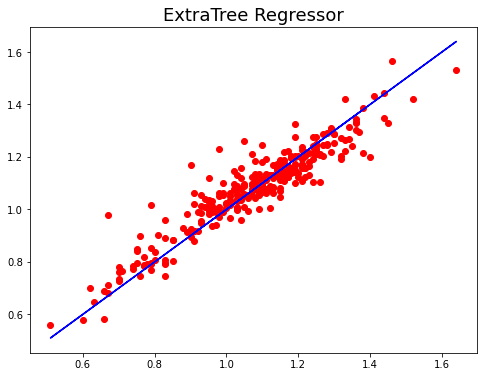

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ETR_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("ExtraTree Regressor",fontsize=18)
plt.show()

In [110]:
model= ExtraTreesRegressor(n_estimators=100)
model.fit(x_train, y_train)

ExtraTreesRegressor()

In [126]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":ETR_pred})
df_pred

,Original,Predicted
Date,,
2016-08-28,1.37,1.2944
2015-06-28,1.36,1.3310
2016-01-05,0.63,0.6464
2015-07-26,1.18,1.1568
2015-11-22,1.06,1.0492
...,...,...
2015-08-03,1.07,1.0958
2015-01-11,1.02,1.1449
2016-12-06,1.01,1.0175


In [111]:
import joblib
joblib.dump(model,"AvacadoPrice.pkl")

['AvacadoPrice.pkl']

In [127]:
y_r=df["region"]
x_r=df.drop("region", axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x_r)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [89]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y_r,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)>=round(accuracy_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 30 The model Perfomes very well
Training accuracy_score is: 59.43000838222967
Testing accuracy_score is: 0.5785953177257525


At random state 31 The model Perfomes very well
Training accuracy_score is: 63.034367141659686
Testing accuracy_score is: 0.5752508361204013


At random state 34 The model Perfomes very well
Training accuracy_score is: 61.60938809723386
Testing accuracy_score is: 0.5819397993311036


At random state 35 The model Perfomes very well
Training accuracy_score is: 60.35205364626991
Testing accuracy_score is: 0.5852842809364549


At random state 36 The model Perfomes very well
Training accuracy_score is: 61.52556580050293
Testing accuracy_score is: 0.5785953177257525


At random state 37 The model Perfomes very well
Training accuracy_score is: 62.447611064543175
Testing accuracy_score is: 0.5819397993311036


At random state 38 The model Perfomes very well
Training accuracy_score is: 62.86672254819782
Testing accuracy_score is: 0.5953177257525084


At r

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y_r,test_size=.20,random_state=31)  
num_folds = 10
seed = 31
scoring = 'accuracy'

In [91]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ("RandomForestClassifier",RandomForestClassifier())
    ]

In [92]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.496183 (0.031029)
Logistic Regression: 0.585889 (0.034983)
Decision Tree: 0.865077 (0.017935)
Naive Bayes: 0.831604 (0.035032)
KNearest Neighbors: 0.808817 (0.032350)
RandomForestClassifier: 0.959769 (0.021401)


In [93]:
#define models and parameters
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)

In [94]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.961464 using {'max_features': 'log2', 'n_estimators': 100}
#3 0.943824 (0.023088) with: {'max_features': 'sqrt', 'n_estimators': 10}
#2 0.958936 (0.018117) with: {'max_features': 'sqrt', 'n_estimators': 100}
#4 0.928690 (0.027195) with: {'max_features': 'log2', 'n_estimators': 10}
#1 0.961464 (0.021815) with: {'max_features': 'log2', 'n_estimators': 100}


Model has been perfoming Best: 0.964524 using {'max_features': 'sqrt', 'n_estimators': 100}
#Let us Check for more Boosting Techniques and go for final model

In [130]:
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_test, predm)) 
    print(confusion_matrix(y_test, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.6287625418060201
[[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.979933110367893
[[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
0.9933110367892977
[[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]:
1.0
[[13  0  0 ...  0  

In [131]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(x_train, y_train)

ExtraTreesClassifier()

In [132]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         4
          14       1.00      

In [133]:
df_pred=pd.DataFrame({"Original Region":y_test,"Predicted Region":predictions})
df_pred

,Original Region,Predicted Region
Date,,
2015-06-12,31,31
2015-08-23,3,3
2016-11-27,7,7
2015-11-29,2,2
2015-06-21,28,28
...,...,...
2015-05-04,3,3
2015-06-21,12,12
2015-07-19,8,8


#Model has achived a Accuracy Score of 97.9%

In [112]:
import joblib
joblib.dump(model,"Avacadoregion.pkl")

['Avacadoregion.pkl']

# Concluding Remarks

In [135]:
#AveragePrice of Avacaods
#We have been able to achive a
#R2 Score of  86.87%
#Cross val Score: 33.79%
#Using ExtraTreesRegressor for predicting the Average Price of Avacados


#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#Region Avacados Belong
#We have been able to achive a
#Accuracy Score of 100%
#Using ExtraTreesClassifier for Predicting the region the Avacados belong to 

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#Correlation of Attributes with Target Variable 

#Correlation of Attributes with that of Average Price 

#Positive  Correlation with Target
#year - "18%"

#Negative Correlation with Target

#Total Volume - "-26%"
#4046    - "-36%"
#4225    - "-13%"
#4770    - "-12%" 
#Total Bags- "-15%"
#region-"-22%"


#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#Correlation of attributes with that of region 

#Positive Correlation with Target

#Total Volume - "10%"
#4046    - "18%"
#4225    - "4%"

#Negative Correlation with Target
#year - "-47%"
#4770    - "-9%" 
#Average Price - "-22%"